In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt

Q 1a

**measure used:** proportion of babies born with anomalies 

**null hypothesis:** Any difference in the proportions of babies born to vaccinated mothers with anomalies and babies born to unvaccinated mothers with anomalies is due to pure randomness.

**sample size:** 6731, number of babies with anomalies born to mothers that have been vaccinated.


8742
The p value of this data is: 0.8742


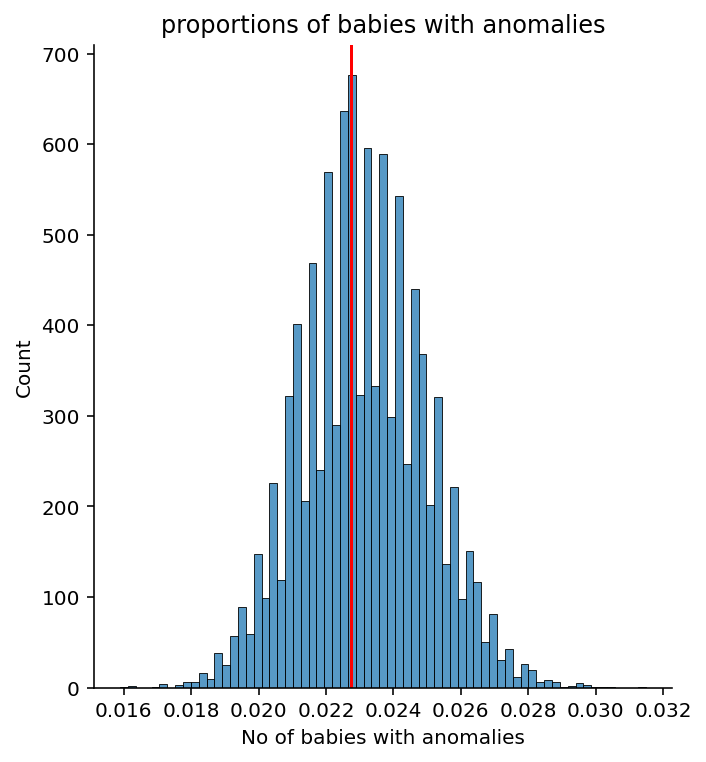

In [2]:
#1b
refpop=np.array(["UN"]*19726+["AN"]*467) #creates a reference population with the unvaccinated proportions
simpop=[] #empty list to store values
vaxprop=153/6731 #finds the proportion of the vaccinated population
for i in range(10000): #runs simulation 10000 times
    p_repolist=np.random.choice(refpop, 6731) #creates new population out of the original data
    simpop.append(np.sum(p_repolist=="AN")/6731) #finds the proportion of babies born to vaccinated mothers in the sim that had anomolies and adds it to the simpop list
#creates histogram of the simpop list and adds titles
p=sns.displot(data=simpop)
p.set(xlabel="No of babies with anomalies")
p.set(title="proportions of babies with anomalies")
plt.axvline(vaxprop, color="red") #plots the observed value from the raw data

simpop1=np.array(simpop) #creates array out of population proportions
count=np.sum(simpop1<=vaxprop) #divides the amount of times the simulated population produced a result as or more extreme than the observed value, for the lower end
print(2*count) #using 2 tailed p value because we want the values that are as or more extreme than the observed value
p=(2*count)/10000
print("The p value of this data is:", p)

lower confidence interval: 0.018174614965582134
upper confidence interval: 0.027534294062298816


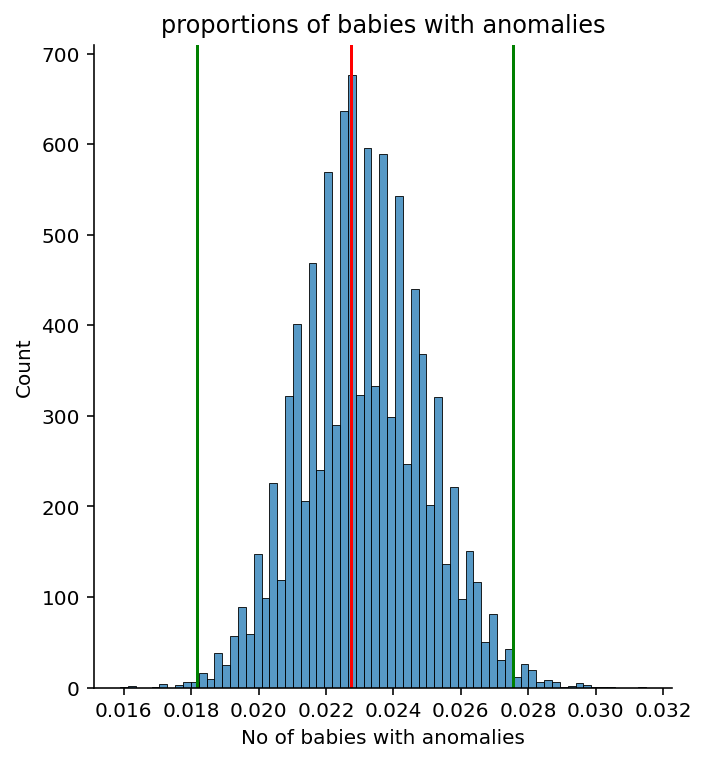

In [3]:
#1c
simpop1.sort() #orders simpop1 array from smallest to largest
lower=simpop1[49] #sets the 49th value in list equal to lower
upper=simpop1[9950] #sets the 950th value in list equal to upper
obs=467/20193 #observed proportion of babies born to unvaccinated mothers with anomalies
lowerCI=(2*obs)-upper #finds cutoff for lower confidence interval
upperCI=(2*obs)-lower #finds cutoff for upper confidence interval
print("lower confidence interval:",lowerCI)#prints the lower confidence interval
print("upper confidence interval:",upperCI) #prints the upper confidence interval
p=sns.displot(data=simpop) #creates histogram of data
p.set(xlabel="No of babies with anomalies") #sets x axis label
p.set(title="proportions of babies with anomalies") #sets title
plt.axvline(vaxprop, color="red") #observed measure
plt.axvline(upperCI, color="green") #upper confidence interval cutoff
plt.axvline(lowerCI, color="green") #lower confidence interval cutoff

1D

The p value of 0.87 found does not allow us to reject the null hypothesis, and means that any difference in the unvaccinated population proportions of babies with anomalies to the vaccinated proportions of babies with anomalies happens, by pure randomness, 87% of the time. We used an alpha of 0.01 as we usually would during this class, and our two\-sided p\-value largely surpassed this. We used a two\-sided p value because we are not only interested in the proportion of babies with anomalies born to vaccinated mothers that are lower than the observed value compared to the proportion of babies with anomalies born to unvaccinated mothers, but also the proportion of babies with anomalies born to vaccinated mothers that are higher than the observed proportion of babies with anomalies born to unvaccinated mothers.

The confidence interval, shown within the green lines above on the histogram, lying between the proportion of about 0.0183 and 0.0289, tells us that if you ran the simulation many \(10,000\) times, the true value of the proportion of babies with anomalies born to unvaccinated mothers lays between 0.0175 and 0.0277 99% of the time. This range surrounds the observed value \(shown in the red line\), which makes sense, considering the extremely high p\-value. Since the p\-value was so high and we have failed to reject the null that the difference in the proportions of anomaly babies born to vaccinated vs unvaccinated mothers is due to randomness, it makes sense that the confidence interval contains values that are both higher and lower than the observed value, further suggesting that the differences are due to pure randomness.


1E

Because the p value we calculated was so high and suggests that the discrepancy in proportions was due to random chance, you would expect the 99% confidence interval for the vaccinated mothers to be extremely similar to the confidence interval for the unvaccinated mothers. Since we fail to reject the null, we expect the proportions of the two populations to be extremely similar, resulting in similar confidence intervals.



In [23]:
#2a
Oatdata=pd.read_csv("cholesterol levels - Sheet1 (1).csv") #imports cholesterol data measurements
Oatdata #prints the table to ensure correctness

CornFlakes  OatBran
0         4.61     3.84
1         6.42     5.57
2         5.40     5.85
3         4.54     4.80
4         3.98     3.68
5         3.82     2.96
6         5.01     4.41
7         4.34     3.72
8         3.80     3.49
9         4.56     3.84
10        5.35     5.26
11        3.89     3.73
12        2.25     1.84
13        4.24     4.41

In [24]:
def slopePlot(Oatdata, labels=["", ""], line_color="gray", point_color="black"): #"def"- defines function
    import matplotlib.pyplot as plt
    from numpy import array

    OatArr = array(Oatdata) #turn data into an array in order to use plt and array
    fig, ax = plt.subplots(figsize=(4, 3)) #figure size

    x1=0.8
    x2=1.2
    n = OatArr.shape[0] #gives the size of the column
    for i in range(n): #runs a loop
        ax.plot([x1, x2], [OatArr[i,0], OatArr[i,1]], color=line_color) 

        # Plot the points
        ax.scatter(n*[x1-0.01], OatArr[:,0], color=point_color, s=25, label=labels[0])
        ax.scatter(n*[x2+0.01], OatArr[:,1], color=point_color, s=25, label=labels[1])

    # Fix the axes and labels
    ax.set_xticks([x1, x2])
    _ = ax.set_xticklabels(labels, fontsize='x-large')

    return ax

Text(0.5, 1.0, 'paired cholesterol levels')

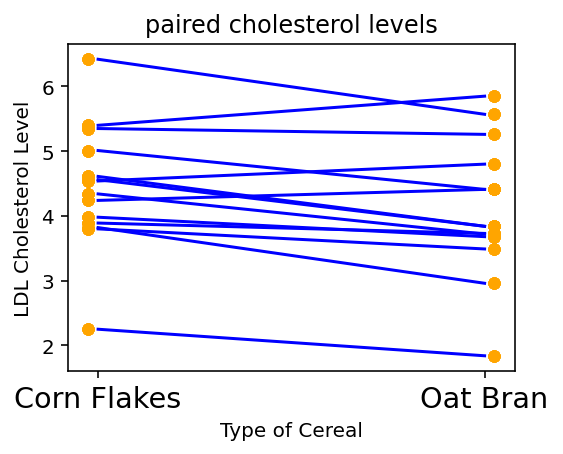

In [38]:

slopePlot(Oatdata, labels=["Corn Flakes", "Oat Bran"], line_color="blue", point_color="orange")
plt.xlabel("Type of Cereal") 
plt.ylabel("LDL Cholesterol Level") 
plt.title("paired cholesterol levels")

[Text(0.5, 1.0, 'cholesterol levels observed in different diets of cereal')]

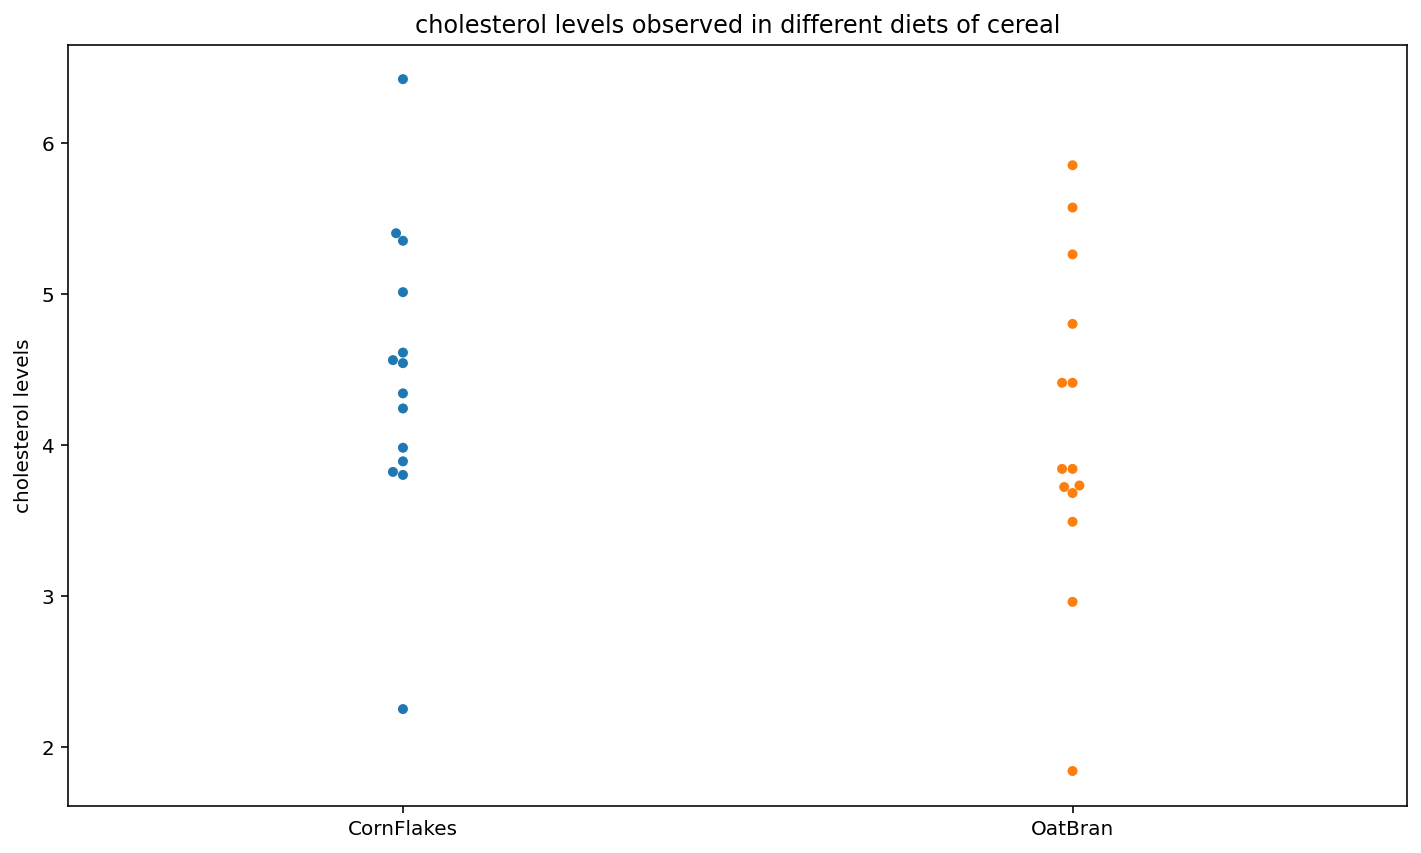

In [39]:
#b
p=sns.swarmplot(data=Oatdata)
p.set(ylabel="cholesterol levels")
p.set(title="cholesterol levels observed in different diets of cereal")

In [28]:
##partC Checking Work
#How to calculate the appropriate measure to compare the groups: Median Differences

CornFlakes=Oatdata["CornFlakes"] #create a list of only the cornflakes column from data
OatBran=Oatdata["OatBran"] #create a list of only the oat bran column from data
Corn_arr=np.array(CornFlakes) #turns list of cornflakes into an array for calculations
Oat_arr=np.array(OatBran) #turn list of oat bran into an array for calculations
diff_array=Corn_arr-Oat_arr #subtracts oat bran array from the cornflakes array to get an array of differences
Mobs_array=np.median(diff_array) #find the median difference of the sample
print("The difference in medians between the cornflakes diet effects and the oat bran cereal effects",Mobs_array) #print the difference in medians


The difference in medians between the cornflakes diet effects and the oat bran cereal effects 0.35999999999999976


In [41]:
#d

#Calculate the p-value for NHST

diff_array=Corn_arr-Oat_arr #subtract oat bran array from the cornflakes array to get an array of differences

Mobs_array=np.median(diff_array) #find the median difference of the sample

onesarray=np.random.choice([-1,1],14) #make an array of randomly chosen +1 and -1 values that will be the same length as the original data

mult_array=onesarray*diff_array #multiply the array of differences and the sign array

newmed_array=np.median(mult_array) #find the median difference for this new array

#do 10000 simulations for NHST
results=np.zeros(10000)
for i in range(10000):
    onesarray = np.random.choice([-1,1],14)
    mult_array= onesarray*diff_array
    newmed_array=np.median(mult_array)
    results[i]=newmed_array



The p-value we found from NHST is 0.041


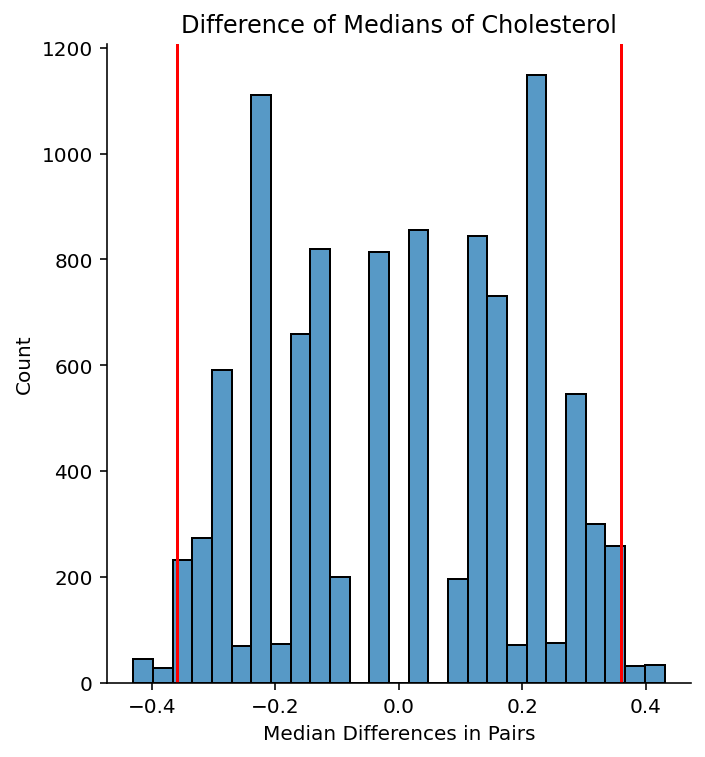

In [42]:
#Making a Histogram   
m=sns.displot(results) #make a histogram of simulation results
m.set(xlabel="Median Differences in Pairs", ylabel="Count")
m.set(title="Difference of Medians of Cholesterol")
plt.axvline(Mobs_array, color="red") #plot where the observed effect size is (Mobs)
plt.axvline((-Mobs_array), color="red") #plot the the lower limit of the effect size

#p-value calculations
var=np.array(results)
high_extremes=np.sum(var>=Mobs_array) #find results that are as or more extreme for upper bound

low_extremes=np.sum(var<=(-Mobs_array))#find resullts that are as or more extreme for lower bound

pval=(high_extremes+low_extremes)/10000 #calculate p-value
print("The p-value we found from NHST is",pval) #print p-value

2f

This simulation produced a p\-value of 0.038, which, when using an alpha of 0.01, the general alpha used for this course, does not produce statistically significant results. We used resampling with replacement because the data was not normally distributed, running a simulation 10,000 times in which we drew random values from the original data set to produce a pseudo\-cornflakes group and a pseudo\-oatbran group to test the null, that any discrepancy found between the differences in cholesterol levels between the cornflakes and oatbran groups was due to pure randomness, not from an effect from either cereal. As seen in the paired slopeplot, individuals experienced both an increase in cholesterol and a decrease in cholesterol levels after switching cereals, indicating that the change in cereals itself did not have an outstanding effect on the cholesterol levels of the people in the study. With a 99% confidence interval calculated to be between \-0.445 and 1.83, the true effect size calculated between the two groups will lay between these values 99% of the time. Since the confidence interval includes 0, or the value of the null hypothesis, we can further fail to reject the null hypothesis. 



2g

We created a "big box" that includes all values in the study, unlabled as to whether they belonged to the cornflake or oatbran group. Then, we redrew a fake cornflake group and oatbran group from the big box to see if the differences in medians \(middle values\) that we saw in the original dataset happened by pure randomness or if it was because of the different cereals that each person ate. We redid this in a simulation 10,000 times, keeping track of each difference in medians that was observed. When we did this, we found that there was about a 4% chance of seeing the differences originally observed happening by chance. While this value initially seems small, that is the same as 1 in 25 times, this occured by chance. In 10,000 simulations, we saw results as extreme or more extreme than this about 400 times. We then used this knowledge to construct an interval of values that the median for any given simulation is likely to fall between. The difference in medians for any given simulation has a 99% chance of falling between \-0.445 and 1.83. If the medians had a difference of 0, this means that the type of cereal that each person ate did not play any role in their cholesterol levels. Since the interval includes the value of 0, we know that it is possible that the type of cereal does not play a part in the difference in cholesterol levels observed in each person.


In [45]:
#3d
pvals=[0.004,0.017,0.021,0.04,0.23,0.32] #import p values
import statsmodels.stats.multitest as smm
smm.multipletests(pvals, alpha=0.05, method='fdr_bh') #preform benjamini hochberg analysis

(array([ True,  True,  True, False, False, False]),
 array([0.024, 0.042, 0.042, 0.06 , 0.276, 0.32 ]),
 0.008512444610847103,
 0.008333333333333333)

As shown in both the work done by hand and in python, the first three p\-values, \(s2 vs s4, s1 vs s4, and s1 vs s3\) remain statistically significant after multiple testing corrections

